In [1]:
from astroML.datasets import fetch_dr7_quasar
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[8,6]

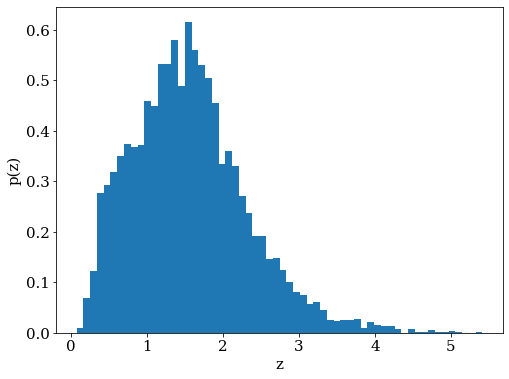

0.0802 5.4135
0.6153783378260578


In [3]:
#let's have a look at the data

N_bins=60

counts, bins, patches = plt.hist(z, density=True, bins=N_bins)
plt.xlabel('z')
plt.ylabel('p(z)')
plt.show()

z_max=max(z)
z_min=min(z)
print(z_min, z_max)

y_max=max(counts)
print(y_max)

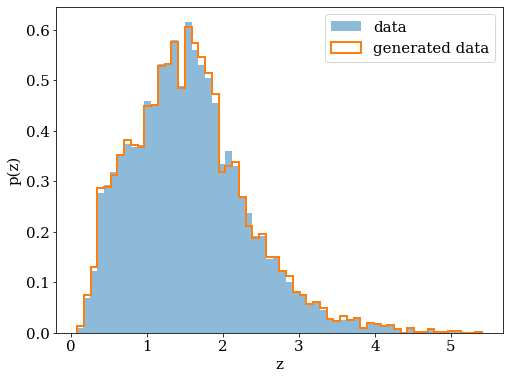

In [4]:
#rejection sampling

# generate the function given by the histogram
h = scipy.stats.rv_histogram((counts,bins))  

N=100000

#generate random points that cover all the distribution, and apply the rejection sample
x = np.random.uniform(0,z_max,N)
y = np.random.uniform(0,y_max,N)

good_x = x[y<h.pdf(x)]

#plot the cloned distribution
plt.hist(z, density=True, bins=N_bins, alpha=0.5, label='data')
plt.hist(good_x, density=True, bins=N_bins, histtype='step', label='generated data', lw=2)
plt.legend()
plt.xlabel('z')
plt.ylabel('p(z)')
plt.show()

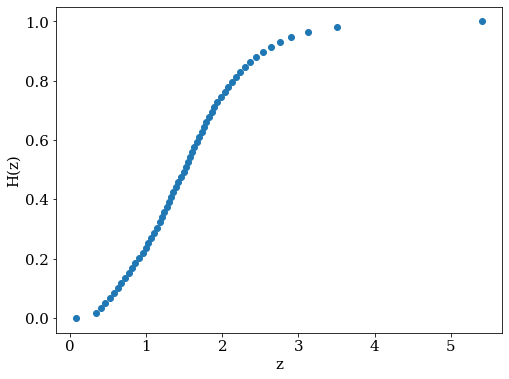

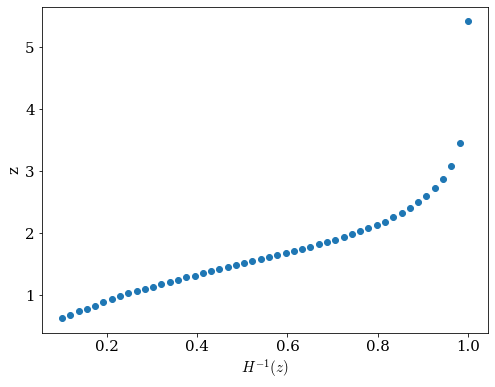

In [5]:
#inverse transform

index = np.linspace(0, len(z)-1, N_bins, dtype=int)

#take the cdf of the histogram
z.sort()
Px_cuml = np.linspace(0,1,len(z))

#plot the cdf of the histogram
plt.scatter(z[index], Px_cuml[index])
plt.xlabel('z')
plt.ylabel('H(z)')
plt.show()

#interpolate now the inverse cumulative distribution
H_inv = scipy.interpolate.interp1d(Px_cuml, z)
xgrid = np.linspace(0.1, 1, 50)
plt.scatter(xgrid, H_inv(xgrid))
plt.ylabel('z')
plt.xlabel(r'$H^{-1}(z)$')
plt.show()

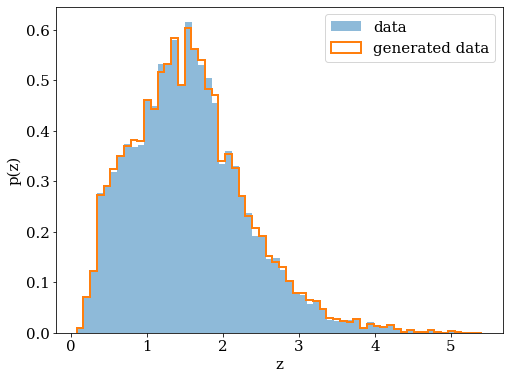

In [6]:
#generate N random number from a uniform distribution between 0 and 1
u = np.random.uniform(0,1,N)

#and put into the inverse function
cloned_distr = H_inv(u)

#plot the cloned distribution
plt.hist(z, density=True, bins=N_bins, alpha=0.5, label='data')
plt.hist(cloned_distr, density=True, bins=N_bins, histtype='step', label='generated data', lw=2)
plt.legend()
plt.xlabel('z')
plt.ylabel('p(z)')
plt.show()

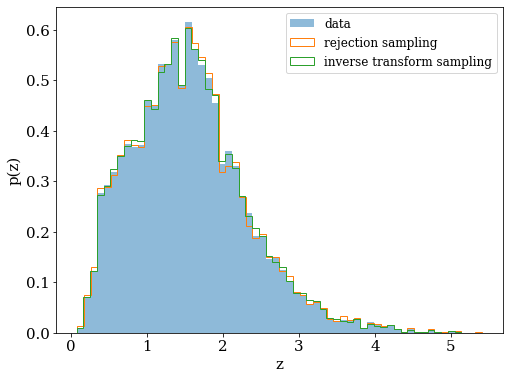

In [7]:
#compare the three results
plt.hist(z, bins=N_bins, density=True, alpha=0.5, label='data');
plt.hist(good_x, bins=N_bins, histtype='step', density=True, label='rejection sampling')
plt.hist(cloned_distr, bins=N_bins, histtype='step', density=True, label='inverse transform sampling')
plt.legend(fontsize=12)
plt.xlabel('z')
plt.ylabel('p(z)')
plt.show()

In [8]:
import astropy
astropy.cosmology.Planck15

FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)

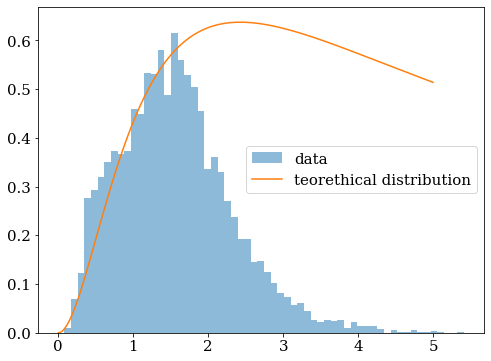

In [17]:
def quasar_distribution(z):
    return 4 * np.pi * astropy.cosmology.Planck15.differential_comoving_volume(z)

z_grid=np.linspace(0,5,1000)
plt.hist(z, bins=N_bins, density=True, alpha=0.5, label='data')
plt.plot(z_grid, 1.2*10e-13 * quasar_distribution(z_grid), label='teorethical distribution')
plt.legend()
plt.show()